### **Exercise 01 Linear Gradient Iteractive**




In [ ]:
import numpy as np

def add_intercept(x):
	"""Adds a column of 1's to the non-empty numpy.ndarray x.
	Args:
	x: has to be an numpy.ndarray, a vector of dimension m * 1.
	Returns:
	X as a numpy.ndarray, a vector of dimension m * 2.
	None if x is not a numpy.ndarray.
	None if x is a empty numpy.ndarray.
	Raises:
	This function should not raise any Exception.
	"""
	if len(x) < 1 or type(x) is not np.ndarray:
		return None
	return np.c_[np.ones(x.shape[0]), x]

In [ ]:
x = np.arange(1,6)
print(add_intercept(x))


[[1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]]


In [ ]:
y = np.arange(1,10).reshape((3,3))
print(add_intercept(y))

[[1. 1. 2. 3.]
 [1. 4. 5. 6.]
 [1. 7. 8. 9.]]


In [ ]:
def predict_(x, theta) -> np.ndarray: 
	if len(x) < 1 or theta.shape[0] < 1:
		return None
	return np.matmul(add_intercept(x), theta)

In [ ]:
x = np.arange(1,6)
theta1 = np.array([5, 0])

In [ ]:
print(theta1.shape)
print(predict_(x, theta1))

(2,)
[5. 5. 5. 5. 5.]


In [ ]:
theta2 = np.array([0,1])
print(predict_(x,theta2))

[1. 2. 3. 4. 5.]


In [ ]:
def simple_gradient(x, y, theta):
	if len(x) < 1 or len(y) < 1 or len(theta) < 1 or x.shape != y.shape or theta.shape[0] < 1 or x is None or y is None:
		return None
	gr_vec = np.zeros((2,))
	y_hat = predict_(x, theta)
	gr_vec[0] =  np.sum((y_hat - y)) / float(y.shape[0])
	gr_vec[1] =  np.sum((y_hat - y) * x) / float(y.shape[0])
	return gr_vec

In [ ]:
x = np.array([12.4956442, 21.5007972, 31.5527382, 48.9145838, 57.5088733])
y = np.array([37.4013816, 36.1473236, 45.7655287, 46.6793434, 59.5585554])

In [ ]:
#Example 0:
theta1 = np.array([2,0.7])
print(simple_gradient(x,y,theta1))

[ -19.0342574  -586.66875564]


In [ ]:
#Example 1:
theta2 = np.array([1,-0.4])
print(simple_gradient(x,y,theta2))

[  -57.86823748 -2230.12297889]


### **Exercise 02 Linear Gradient Vectorized Version**


In [ ]:
def gradient(x, y, theta):

	if len(x) < 1 or len(y) < 1 or len(theta) < 1 or x.shape != y.shape or theta.shape[0] < 1 or x is None or y is None:
		return None
	y_hat = predict_(x, theta)
	gr_vec = (np.matmul(np.transpose(add_intercept(x)), (y_hat - y))) / y.shape[0]
	return gr_vec

In [ ]:
x = np.array([12.4956442, 21.5007972, 31.5527382, 48.9145838, 57.5088733])
y = np.array([37.4013816, 36.1473236, 45.7655287, 46.6793434, 59.5585554])

In [ ]:
theta1 = np.array([2, 0.7])
print(gradient(x, y, theta1))

[ -19.0342574  -586.66875564]


In [ ]:
theta2 = np.array([1, -0.4])
print(gradient(x, y, theta2))

[  -57.86823748 -2230.12297889]


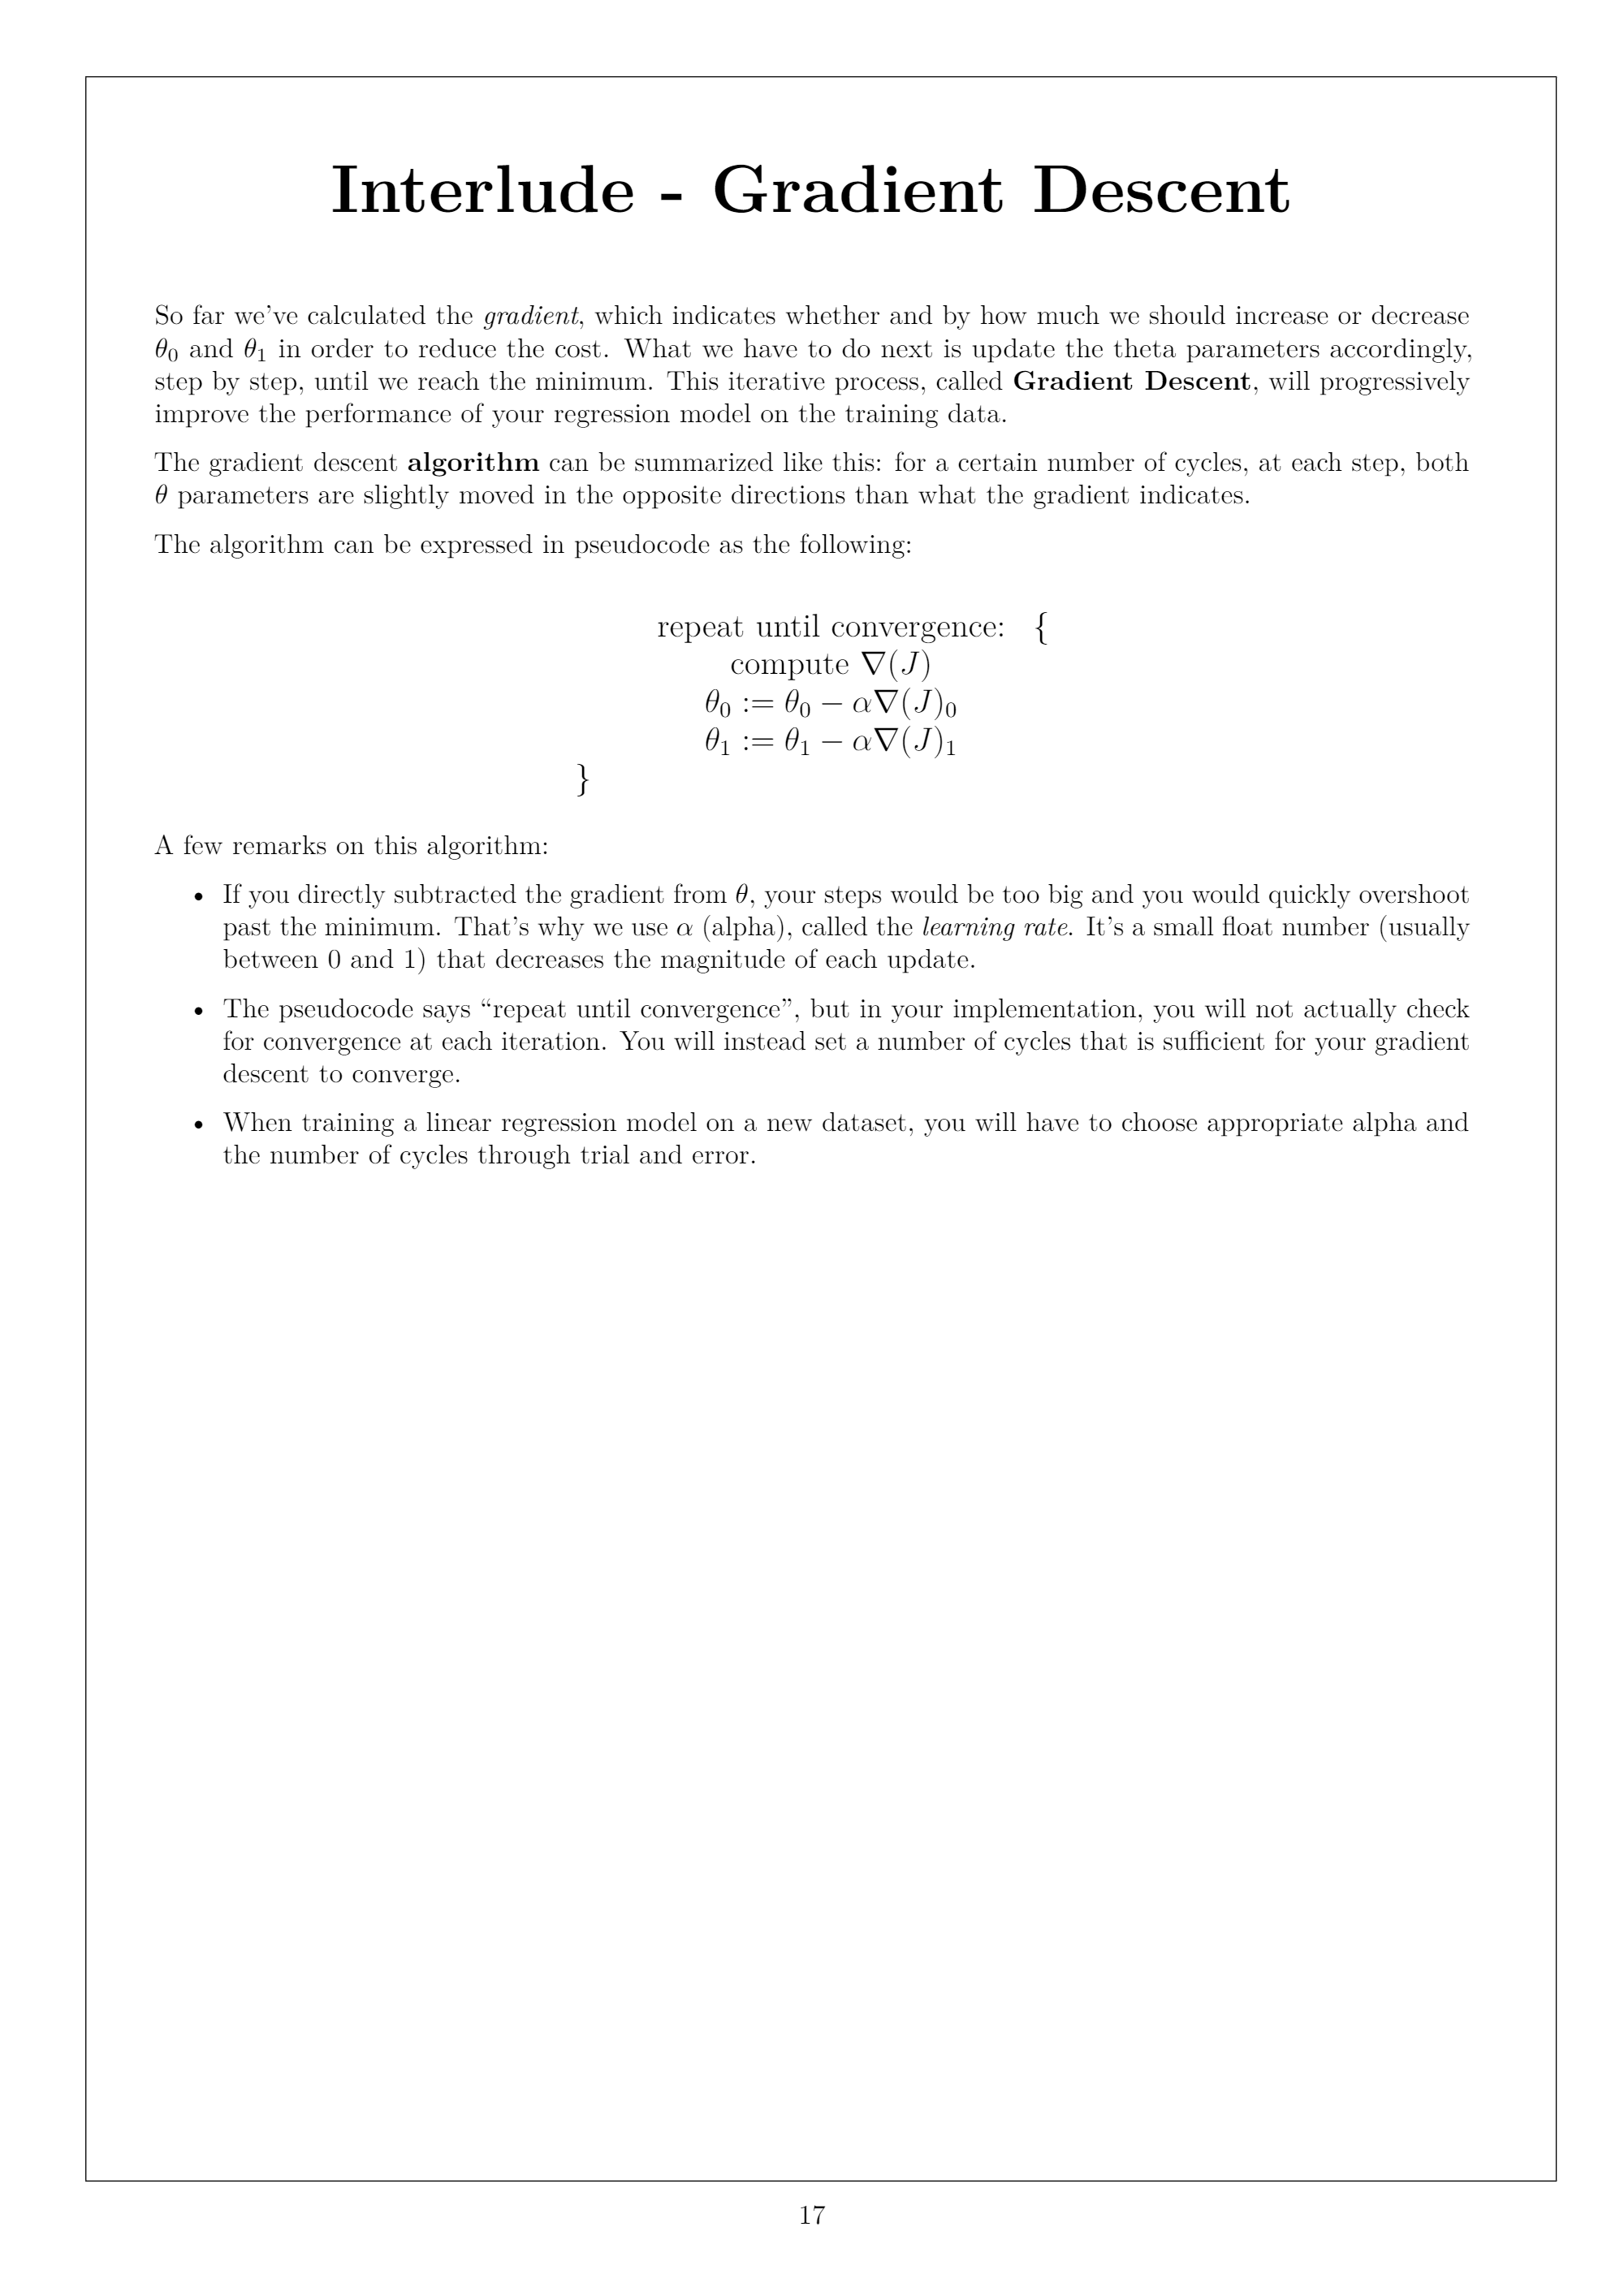

### **Exercise 03  Gradient Descent**


In [ ]:
def fit_(x, y, theta, alpha, max_iter):
	"""
	Description:
	Fits the model to the training dataset contained in x and y.
	Args:
	x: has to be a numpy.ndarray, a vector of dimension m * 1: (number of training examples, 1).
	y: has to be a numpy.ndarray, a vector of dimension m * 1: (number of training examples, 1).
	theta: has to be a numpy.ndarray, a vector of dimension 2 * 1.
	alpha: has to be a float, the learning rate
	max_iter: has to be an int, the number of iterations done during the gradient descent
	Returns:
	new_theta: numpy.ndarray, a vector of dimension 2 * 1.
	None if there is a matching dimension problem.
	Raises:
	This function should not raise any Exception.
	"""
	if len(x) < 1 or len(y) < 1 or len(theta) < 1 or x.shape != y.shape or theta.shape[0] < 1 or x is None or y is None:
		return None
	for _ in range(max_iter):
		theta -= (gradient(x, y, theta) * alpha)
	return theta

In [ ]:
x = np.array([12.4956442, 21.5007972, 31.5527382, 48.9145838, 57.5088733])
y = np.array([37.4013816, 36.1473236, 45.7655287, 46.6793434, 59.5585554])
theta= np.array([1.0, 1.0])

In [ ]:
theta1 = fit_(x, y, theta, alpha=5e-8, max_iter = 150)
print(theta1)
print(predict_(x, theta1))

[1.0008501  1.01536613]
[13.68850403 22.83203142 33.03843188 50.66706192 59.39341241]


In [ ]:
theta1 = fit_(x, y, theta, alpha=5e-8, max_iter = 2000)
print(theta1)
print(predict_(x, theta1))

[1.00174255 1.03022413]
[13.87505677 23.15238272 33.50813493 51.39472727 60.24877173]


### **Exercise 04  Linear Regression with Class**


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
class MyLinearRegression():
	"""
	Description:
	My personnal linear regression class to fit like a boss.
	"""
	def __init__(self,  thetas, alpha=0.1, max_iter=15000):
		self.alpha = alpha
		self.max_iter = max_iter
		self.thetas = thetas

	def gradient(self, x, y, theta):
		"""Computes a gradient vector from three non-empty numpy.ndarray, without any for loop. The
		,→ three arrays must have compatible dimensions.
		Args:
		x: has to be a numpy.ndarray, a matrix of dimension m * 1.
		y: has to be a numpy.ndarray, a vector of dimension m * 1.
		theta: has to be a numpy.ndarray, a 2 * 1 vector.
		Returns:
		The gradient as a numpy.ndarray, a vector of dimension 2 * 1.
		None if x, y, or theta is an empty numpy.ndarray.
		None if x, y and theta do not have compatible dimensions.
		Raises:
		This function should not raise any Exception.
		"""
		if len(x) < 1 or len(y) < 1 or len(theta) < 1 or x.shape != y.shape or len(self.thetas) < 1 or x is None or y is None:
			return None
		y_hat = self.predict_(x)
		gr_vec = (np.matmul(np.transpose(self.add_intercept(x)), (y_hat - y))) / y.shape[0]
		return gr_vec

	def fit_(self, x, y):
		"""
		Description:
		Fits the model to the training dataset contained in x and y.
		Args:
		x: has to be a numpy.ndarray, a vector of dimension m * 1: (number of training examples, 1).
		y: has to be a numpy.ndarray, a vector of dimension m * 1: (number of training examples, 1).
		theta: has to be a numpy.ndarray, a vector of dimension 2 * 1.
		alpha: has to be a float, the learning rate
		max_iter: has to be an int, the number of iterations done during the gradient descent
		Returns:
		new_theta: numpy.ndarray, a vector of dimension 2 * 1.
		None if there is a matching dimension problem.
		Raises:
		This function should not raise any Exception.
		"""
		if len(x) < 1 or len(y) < 1 or len(self.thetas) < 1 or x.shape != y.shape or x is None or y is None:
			return None
		x_norm = (x - x.mean()) / x.std()
		y_norm = (y - y.mean()) / y.std()
		for _ in range(self.max_iter):
			self.thetas -= (self.gradient(x_norm, y_norm, self.thetas) * self.alpha)
		self.thetas[0] = y.mean() + ((self.thetas[0] - (self.thetas[1] * x.mean() / x.std())) * y.std())
		self.thetas[1] = (self.thetas[1] * y.std() / x.std())
		return self.thetas
	
	def predict_(self, x):
		"""Computes the vector of prediction y_hat from two non-empty numpy.ndarray.
		Args:
		x: has to be an numpy.ndarray, a vector of dimension m * 1.
		theta: has to be an numpy.ndarray, a vector of dimension 2 * 1.
		Returns:
		y_hat as a numpy.ndarray, a vector of dimension m * 1.
		None if x or theta are empty numpy.ndarray.
		None if x or theta dimensions are not appropriate.
		Raises:
		This function should not raise any Exceptions.
		"""
		if len(x) < 1 or len(self.thetas) < 1:
			return None
		return np.matmul(self.add_intercept(x), self.thetas)

	def add_intercept(self, x):
		"""Adds a column of 1's to the non-empty numpy.ndarray x.
		Args:
		x: has to be an numpy.ndarray, a vector of dimension m * 1.
		Returns:
		X as a numpy.ndarray, a vector of dimension m * 2.
		None if x is not a numpy.ndarray.
		None if x is a empty numpy.ndarray.
		Raises:
		This function should not raise any Exception.
		"""
		if len(x) < 1 or type(x) is not np.ndarray:
			return None
		return np.c_[np.ones(x.shape[0]), x]


	def cost_elem_(self, y_hat, y):
		"""
		Description:
		Calculates all the elements (1/M)*(y_pred - y)^2 of the cost function.
		Args:
		y: has to be an numpy.ndarray, a vector.
		y_hat: has to be an numpy.ndarray, a vector.
		Returns:
		J_elem: numpy.ndarray, a vector of dimension (number of the training examples,1).
		None if there is a dimension matching problem between X, Y or theta.
		Raises:
		This function should not raise any Exception.
		"""
		return (np.power(y_hat - y, 2)) / (2 * y.shape[0])

	def cost_(self, y_hat, y):
		"""Computes the mean squared error of two non-empty numpy.ndarray, without any for loop. The
		􏰀→ two arrays must have the same dimensions. Args:
		y: has to be an numpy.ndarray, a vector. y_hat: has to be an numpy.ndarray, a vector. Returns:
		The mean squared error of the two vectors as a float.
		None if y or y_hat are empty numpy.ndarray.
		None if y and y_hat does not share the same dimensions.
		Raises:
		This function should not raise any Exceptions.
		"""
		j_elem = self.cost_elem_(y_hat, y)
		return None if j_elem is None else np.sum(j_elem, dtype=float, axis=0)
	
	def mse_(self, x, y):
		"""
		Description:
		Calculate the MSE between the predicted output and the real output.
		Args:
		y: has to be a numpy.ndarray, a vector of dimension m * 1.
		y_hat: has to be a numpy.ndarray, a vector of dimension m * 1.
		Returns:
		mse: has to be a float.
		None if there is a matching dimension problem.
		Raises:
		This function should not raise any Exceptions.
		"""
		y_hat = self.predict_(x)
		if len(y) < 1 or len(y_hat) < 1: #or y.shape != y_hat.shape:
			return None
		return np.sum((y_hat - y) **2) / float(y.shape[0])
	
	def r2score_(self, y, y_hat):
		"""
		Description:
		Calculate the R2score between the predicted output and the output.
		Args:
		y: has to be a numpy.ndarray, a vector of dimension m * 1.
		y_hat: has to be a numpy.ndarray, a vector of dimension m * 1.
		Returns:
		r2score: has to be a float.
		None if there is a matching dimension problem.
		Raises:
		This function should not raise any Exceptions.
		"""
		if len(y) < 1 or len(y_hat) < 1 or y.shape != y_hat.shape:
			return None
		return 1.0 - (np.sum((y_hat - y) **2.0) / np.sum((y_hat - np.mean(y)) **2.0))

In [ ]:
x = np.array([12.4956442, 21.5007972, 31.5527382, 48.9145838, 57.5088733])
y = np.array([37.4013816, 36.1473236, 45.7655287, 46.6793434, 59.5585554])

In [ ]:
lr1 = MyLinearRegression([2, 0.7])

lr1.predict_(x)

array([10.74695094, 17.05055804, 24.08691674, 36.24020866, 42.25621131])

In [ ]:
lr1.cost_elem_(lr1.predict_(x),y)

array([71.04586738, 36.46864549, 46.99622165, 10.89755341, 29.9371111 ])

In [ ]:
lr1.cost_(lr1.predict_(x),y)

195.34539903032385

### **Exercise 05  Practicing Linear Regression**


In [ ]:
import pandas as pd
from sklearn.metrics import mean_squared_error

In [ ]:
data = pd.read_csv('/content/are_blue.txt', sep='\t')
data

,Patient,Micrograms,Score
0,1,1.17,78.93
1,2,2.97,58.20
2,3,3.26,67.47
3,4,4.69,37.47
4,5,5.83,45.65
5,6,6.00,32.92
6,7,6.41,29.97


In [ ]:
Xpill = np.array(data['Micrograms']).reshape(-1,1)
yscore = np.array(data['Score']).reshape(-1,1)

In [ ]:
linear_model1 = MyLinearRegression(np.array([[89],[-8]]))
linear_model2 = MyLinearRegression(np.array([[89],[-6]]))

In [ ]:
y_model1 = linear_model1.predict_(Xpill)
y_model2 = linear_model2.predict_(Xpill)

In [ ]:
print(linear_model1.mse_(Xpill,yscore))
print(mean_squared_error(yscore, y_model1))

57.603042857142825
57.603042857142825


In [ ]:
print(linear_model1.thetas)
theta1_array = np.array([-14, -12, -10, -8, -6, -4])
cost_array = np.zeros(6,)

[[89]
 [-8]]


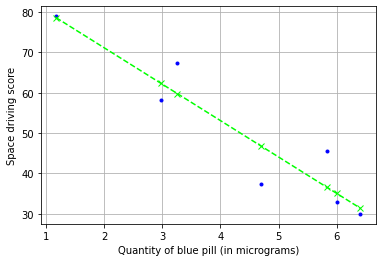

In [ ]:
def predict_(x: np.ndarray, theta: np.ndarray):
	if len(x) < 1 or theta.shape != (2,):
		return None
	return theta[0] + (theta[1] * x)

def add_intercept(x):
	if len(x) < 1 or type(x) is not np.ndarray:
		return None
	return np.c_[np.ones(x.shape[0]), x]


def cost_elem_(y_hat, y):
	return (np.power(y_hat - y, 2)) / (2 * y.shape[0])

def cost_(y_hat, y):
	j_elem = cost_elem_(y_hat, y)
	return np.sum(j_elem)

if __name__ == "__main__":
	data = pd.read_csv('/content/are_blue.txt',sep='\t')
	Xpill = np.array(data['Micrograms']).reshape(-1,1)
	Yscore = np.array(data['Score']).reshape(-1,1)
	linear_model1 = MyLinearRegression(np.array([[89.0], [-8]]))
	linear_model2 = MyLinearRegression(np.array([[89.0], [-6]]))

	# Y_model1 = linear_model1.predict_(Xpill)
	# Y_model2 = linear_model2.predict_(Xpill)
	# print(linear_model1.mse_(Xpill, Yscore))
	# print(mean_squared_error(Yscore, Y_model1))
	# print(linear_model2.mse_(Xpill, Yscore))
	# print(mean_squared_error(Yscore, Y_model2))

	# print(Yscore)
	# #print(linear_model1.cost_(linear_model1.predict_(Xpill), Yscore))
	# #linear_model1.fit_(Xpill, Yscore)
	# print(linear_model1.thetas)
	# theta1_array = np.array([-14, -12, -10, -8, -6, -4])
	# cost_array = np.zeros(6,)
	# for j in range(87, 92):
	# 	for i in range(6):
	# 		print(theta1_array[i])
	# 		pre = predict_(Xpill, np.array([j, theta1_array[i]]))
	# 		#print(pre)
	# 		#print(cost_(pre, Yscore))
	# 		cost_array[i] = cost_(pre, Yscore)
	# 	plt.plot(theta1_array, cost_array)
	# print(cost_array)
	# #plt.plot(theta1_array, cost_array)
	# plt.grid()
	# plt.show()

	linear_model1.fit_(Xpill, Yscore)
	Y_model1 = linear_model1.predict_(Xpill)	
	plt.plot(Xpill, Yscore, '.', color='b')
	plt.plot(Xpill, Y_model1, 'x', color='lime')
	plt.plot(Xpill, Y_model1, 'r--', color='lime')
	plt.xlabel('Quantity of blue pill (in micrograms)')
	plt.ylabel('Space driving score')
	plt.title	
	plt.grid()
	plt.show()

### **Exercise 06  Normalizacion 01: Z-Score Standardization**


In [ ]:
def zscore(x):
  if len(x) < 1 or x is None:
    return None
  return (x - x.mean()) / x.std()

In [ ]:
X = np.array([0, 15, -9, 7, 12, 3, -21])
zscore(X)

array([-0.08620324,  1.2068453 , -0.86203236,  0.51721942,  0.94823559,
        0.17240647, -1.89647119])

In [ ]:
Y = np.array([2, 14, -13, 5, 12, 4, -19])
zscore(Y)

array([ 0.11267619,  1.16432067, -1.20187941,  0.37558731,  0.98904659,
        0.28795027, -1.72770165])

### **Exercise 07  Normalizacion 02: Min Max Standardization**


In [ ]:
def minmax(x):
  if len(x) < 1 or x is None:
    return None
  return (x - min(x)) / (max(x) - min(x))

In [ ]:
X = np.array([0, 15, -9, 7, 12, 3, -21])
minmax(X)

array([0.58333333, 1.        , 0.33333333, 0.77777778, 0.91666667,
       0.66666667, 0.        ])

In [ ]:
Y = np.array([2, 14, -13, 5, 12, 4, -19])
minmax(Y)

array([0.63636364, 1.        , 0.18181818, 0.72727273, 0.93939394,
       0.6969697 , 0.        ])